In [1]:
Sys.setenv(SPARK_HOME = "/opt/local/spark/spark-2.0.0-bin-hadoop2.7")

In [2]:
library(SparkR, lib.loc = c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib")))


Attaching package: ‘SparkR’

The following objects are masked from ‘package:stats’:

    cov, filter, lag, na.omit, predict, sd, var, window

The following objects are masked from ‘package:base’:

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union



In [3]:
sparkR.session(master = "local[*]", sparkConfig = list(spark.driver.memory = "1g"))

Launching java with spark-submit command /opt/local/spark/spark-2.0.0-bin-hadoop2.7/bin/spark-submit   --driver-memory "1g" sparkr-shell /var/folders/cx/v45t2v2n6b548_vfn76vnzlw0050sr/T//Rtmp18TZsj/backend_port188746a36c16 


Java ref type org.apache.spark.sql.SparkSession id 1 

In [74]:
irisDF <- suppressWarnings(createDataFrame(iris))
kmeansDF <- irisDF
kmeansTestDF <- irisDF
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [75]:
kmeansModel <- spark.kmeans(kmeansDF, ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width, k = 3)

In [77]:
kmeansPredictions <- predict(kmeansModel, kmeansTestDF)
pred.df <- as.data.frame(kmeansPredictions)

In [81]:
library(data.table)
library(dplyr)
pred.df %>% as.data.table %>% select(Species, prediction) %>% unique

Species,prediction
setosa,0
versicolor,1
versicolor,2
virginica,1
virginica,2


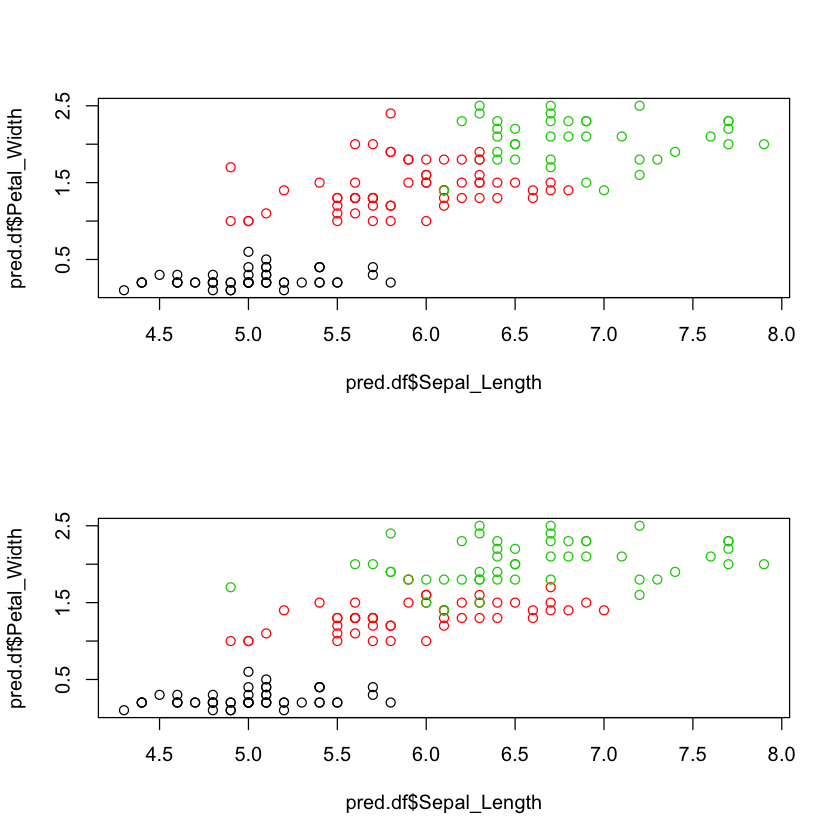

In [100]:
par(mfrow=c(2,1))
cols <- rep(1, length(pred.df$prediction))
cols[pred.df$prediction == 1] <- 3
cols[pred.df$prediction == 2] <- 2
plot(pred.df$Sepal_Length, pred.df$Petal_Width, col=cols)
plot(pred.df$Sepal_Length, pred.df$Petal_Width, col=as.factor(pred.df$Species))

In [98]:
cols

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1